# Import Libraries and Data

In [1]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

warnings.filterwarnings("ignore")

C:\Users\willb\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\willb\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#Load dataset
try:
    data = pd.read_csv('BBC News.csv')
    print("Data loaded successfully.")
except FileNotFoundError as e:
    print(f"File not found: {e}")
    exit()

Data loaded successfully.


# Generic Data Exploration

In [3]:
#Check for missing values
print(f"Missing values in dataset: \n{data.isnull().sum()}")

Missing values in dataset: 
ArticleId    0
Text         0
Category     0
dtype: int64


In [4]:
#List unique categories
print(f"Unique categories: {data['Category'].unique()}")

Unique categories: ['business' 'tech' 'politics' 'sport' 'entertainment']


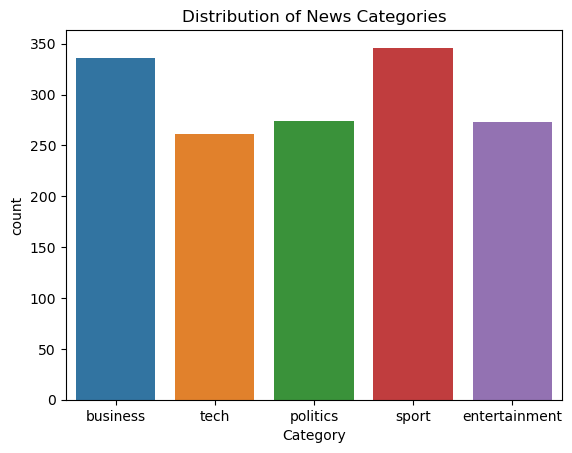

In [5]:
#Category distribution chart
sns.countplot(data['Category'])
plt.title('Distribution of News Categories')
plt.show()

# Word Cloud Creation

Creating word cloud for category: business


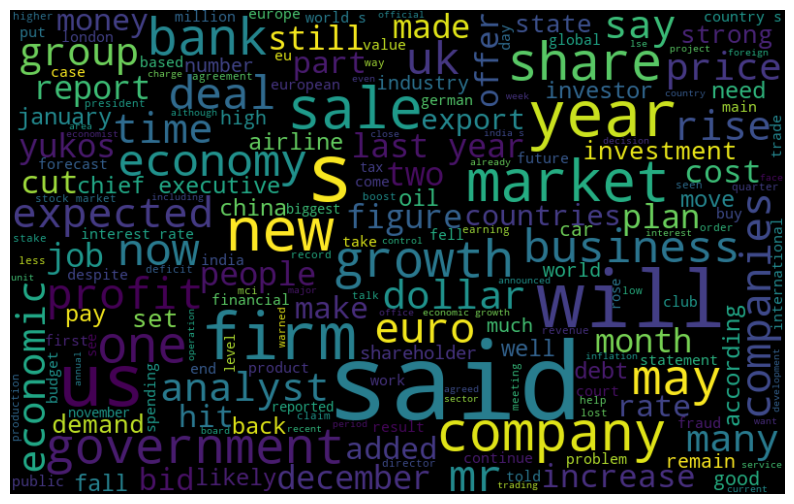

Creating word cloud for category: tech


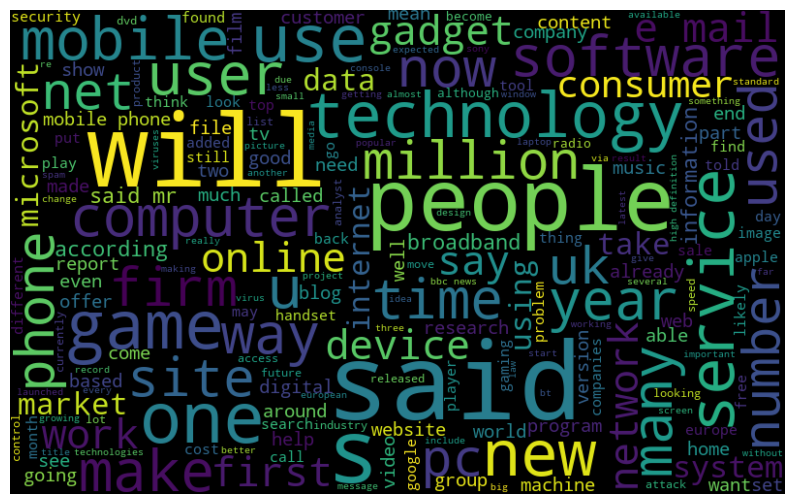

Creating word cloud for category: politics


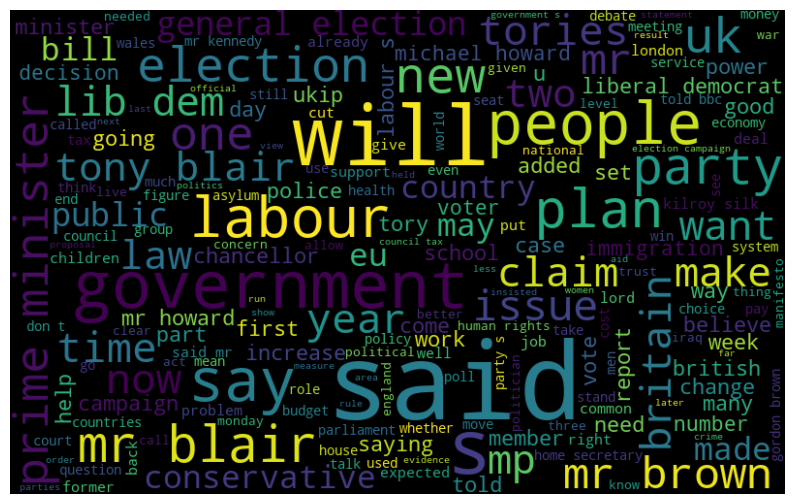

Creating word cloud for category: sport


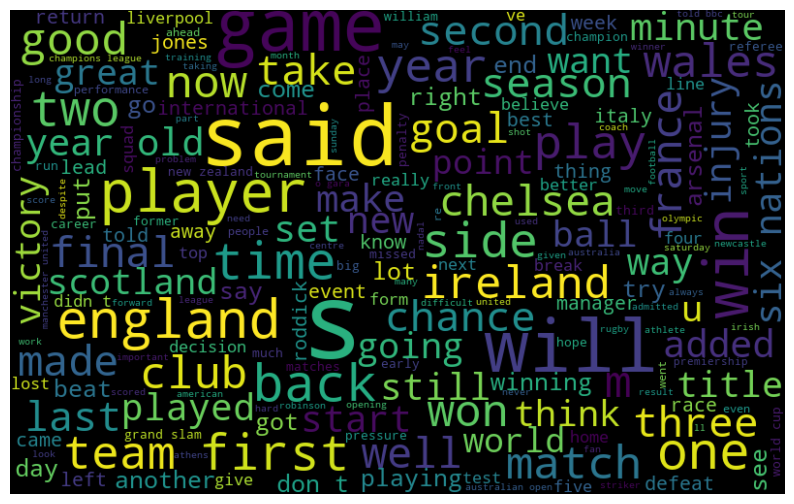

Creating word cloud for category: entertainment


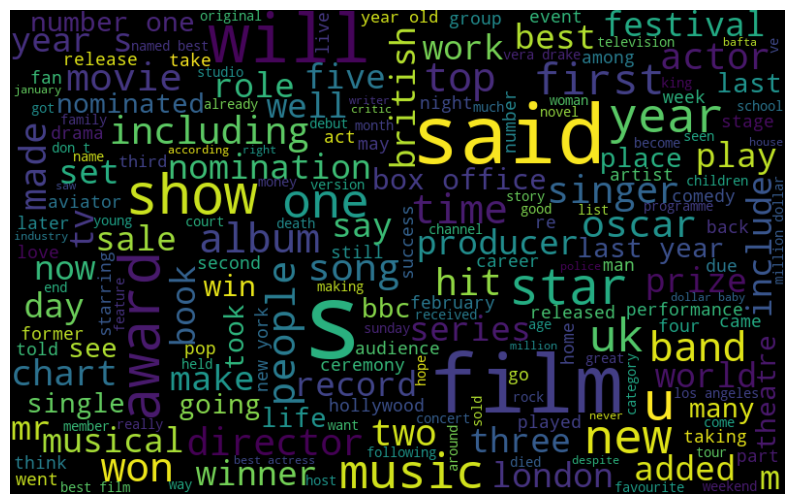

In [6]:
# Create a word cloud for each category
def create_wordcloud(words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

for category in data['Category'].unique():
    subset = data[data['Category'] == category]
    text = " ".join(subset['Text'].values)
    print(f"Creating word cloud for category: {category}")
    create_wordcloud(text)

# Data Cleaning and Processing

In [7]:
#Text Processing
def process_text(text):
    """Clean and tokenize text."""
    text = text.lower().replace('\n', ' ').replace('\r', '').strip()
    text = re.sub(' +', ' ', text)  #Remove extra spaces
    text = re.sub(r'[^\w\s]', '', text)  #Remove special characters
    
    stop_words = set(stopwords.words('english')) 
    word_tokens = word_tokenize(text) 
    filtered_sentence = [w for w in word_tokens if w not in stop_words] 
    text = " ".join(filtered_sentence)
    return text

In [8]:
#Apply Text Processing
print("\nProcessing text...")
data['Text_parsed'] = data['Text'].apply(process_text)


Processing text...


In [9]:
#Check the first 5 rows to make sure the 'Text_parsed' column has been created
print("\nSample of processed text:\n", data[['Text', 'Text_parsed']].head())


Sample of processed text:
                                                 Text  \
0  worldcom ex-boss launches defence lawyers defe...   
1  german business confidence slides german busin...   
2  bbc poll indicates economic gloom citizens in ...   
3  lifestyle  governs mobile choice  faster  bett...   
4  enron bosses in $168m payout eighteen former e...   

                                         Text_parsed  
0  worldcom exboss launches defence lawyers defen...  
1  german business confidence slides german busin...  
2  bbc poll indicates economic gloom citizens maj...  
3  lifestyle governs mobile choice faster better ...  
4  enron bosses 168m payout eighteen former enron...  


In [10]:
#Data Preparation
X = data['Text_parsed']
y = data['Category']

# Model Creation

In [11]:
#Split Data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)
print(f"\nTraining set size: {X_train.shape[0]}, Test set size: {X_test.shape[0]}")


Training set size: 1192, Test set size: 298


In [12]:
#TF-IDF Vectorization
tfidf = TfidfVectorizer(encoding='utf-8', ngram_range=(1, 2), min_df=10, max_df=1.0, max_features=300, norm='l2', sublinear_tf=True)
features_train = tfidf.fit_transform(X_train).toarray()
features_test = tfidf.transform(X_test).toarray()

In [13]:
#Logistic Regression
print("\n---Logistic Regression---")
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(features_train, y_train)
log_reg_predictions = log_reg.predict(features_test)


---Logistic Regression---


In [14]:
#Logistic Regression performance
print('Logistic Regression Accuracy:', accuracy_score(y_test, log_reg_predictions))
print(classification_report(y_test, log_reg_predictions))

Logistic Regression Accuracy: 0.9429530201342282
               precision    recall  f1-score   support

     business       0.92      0.92      0.92        76
entertainment       0.98      0.98      0.98        47
     politics       0.96      0.87      0.91        55
        sport       0.96      0.98      0.97        65
         tech       0.91      0.96      0.94        55

     accuracy                           0.94       298
    macro avg       0.95      0.94      0.94       298
 weighted avg       0.94      0.94      0.94       298



In [15]:
#K-Nearest Neighbors (KNN)
print("\n---K-Nearest Neighbors---")
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(features_train, y_train)
knn_predictions = knn.predict(features_test)


---K-Nearest Neighbors---


In [16]:
#Model performance
print('KNN Accuracy:', accuracy_score(y_test, knn_predictions))
print(classification_report(y_test, knn_predictions))

KNN Accuracy: 0.912751677852349
               precision    recall  f1-score   support

     business       0.92      0.87      0.89        76
entertainment       1.00      0.89      0.94        47
     politics       0.84      0.89      0.87        55
        sport       0.98      0.95      0.97        65
         tech       0.84      0.96      0.90        55

     accuracy                           0.91       298
    macro avg       0.92      0.91      0.91       298
 weighted avg       0.92      0.91      0.91       298



# User Input

In [17]:
#Predict User Input
def predict_user_input(user_input):
    """Predict the category of user input using the trained logistic regression model and provide a confidence score."""
    user_input_processed = process_text(user_input)  #Process the user input
    user_input_tfidf = tfidf.transform([user_input_processed])
    prediction = log_reg.predict(user_input_tfidf)
    prediction_probabilities = log_reg.predict_proba(user_input_tfidf)
    
    predicted_category = prediction[0]
    confidence = max(prediction_probabilities[0]) * 100  #Get the confidence percentage
    
    print(f"\nThe predicted category for '{user_input}' is: {predicted_category}")
    print(f"Confidence Score: {confidence:.2f}%")
    
    if confidence < 50:  #Threshold for "unsure" message to be displayed
        print("Note: The model is unsure about this prediction due to low confidence.")

In [18]:
#User Input with Exit Option
while True:
    user_input = input("\nEnter a topic to classify (or type 'exit' to quit): ")
    if user_input.lower() == 'exit':
        print("\nExiting the program. Goodbye!")
        break
    elif user_input.strip() == '':
        print("\nYou entered an empty topic. Please try again.")
    else:
        predict_user_input(user_input)


Enter a topic to classify (or type 'exit' to quit): soccer

The predicted category for 'soccer' is: sport
Confidence Score: 31.93%
Note: The model is unsure about this prediction due to low confidence.

Enter a topic to classify (or type 'exit' to quit): finance

The predicted category for 'finance' is: sport
Confidence Score: 31.93%
Note: The model is unsure about this prediction due to low confidence.

Enter a topic to classify (or type 'exit' to quit): stock market

The predicted category for 'stock market' is: business
Confidence Score: 82.93%

Enter a topic to classify (or type 'exit' to quit): politician

The predicted category for 'politician' is: sport
Confidence Score: 31.93%
Note: The model is unsure about this prediction due to low confidence.

Enter a topic to classify (or type 'exit' to quit): exit

Exiting the program. Goodbye!
